<div class="alert alert-info"><big><b>Комментарий ревьюера</b></big><br>Привет, Роман! 👋<br><br> Ничего не поменялось, меня всё ещё зовут Дмитрий Кирсанов. <br><br>Комментарии всё ещё обозначены пометкой <b>Комментарий ревьюера</b> и всё ещё содержат описание <br><span class="alert-success">✔️ хорошего, 👍 отличного, 📝 советов</span>,&nbsp;&nbsp;<span class="alert-warning">📌 важного, ⚠️ замечаний, 💡 рекомендаций</span>,&nbsp;&nbsp;<span class="alert-danger">🔧 доработок, 🚫 ошибок или 👀 вопросов.</span><br><br>Код, которым я предлагаю выделять твои комментарии:<br><code>&lt;div class=&quot;alert btn-primary&quot;&gt;&lt;b&gt;Комментарий студента:&lt;/b&gt;&lt;br&gt;   Ок   &lt;/div&gt;</code><br>Всё ещё просьба задавать вопросы и описывать изменения в проект.</div>

**Презентация**  
https://disk.yandex.ru/i/DaqjbX5IFThDaQ


# Банки — Сегментация пользователей по потреблению  
# Задача**:**

Проанализируйте клиентов регионального банка и сегментируйте пользователей по количеству потребляемых продуктов.

- Проведите исследовательский анализ данных,
- Сегментируйте пользователей на основе данных о количестве потребляемых продуктов,
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных.*

In [1]:
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt

from scipy import stats as st
import numpy as np
import math as mth
import plotly.express as px

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;📝<br>
Хорошо, что в начале работы помещаешь задачи работы, это позволит читателям быстрее понять, о чём работа. Хорошо, что заголовок содержит описание того умения, которое демонстрируется этой работой.

Импорт библиотек в самом начале позволит быстро понять, какое окружение нужно для ноутбука. Такой код проще поддерживать.

Если ты не используешь потом какие-то библиотеки или методы (datetime, math, plotly.express), их импорт можно закомментировать. Если передумаешь, то сможешь убрать пометки комментирования и всё снова заработает. 

<a href='https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html'>Материал по импорту.</a> Также есть простые правила — не стоит импортировать дважды одно и то же, желательно разбивать импорт на группы (отделять друг от друга переносами строк и комментариями), при этом импорт стандартных библиотек стоит размещать в начале.
</div>

## Предобработка данных

In [2]:
bank_data = pd.read_csv('/datasets/bank_dataset.csv', sep=',')
display(bank_data.head())
bank_data.info()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Всего 10000 строк в каждом столбце, кроме Balance. Пропуски есть только в нем.  
Все типы данных корректны. 
Пропуски могли возникнуть при выгрузке датасета или клиент заморозил свой счет или данные о балансе счета клиента могут быть конфиденциальны, напрмиер это сотрудник этого банка и у нас нет доступа к такой информации, так же могут быть сотрудниками спец служб или в/ч которые находятся в этих городах(Ярославль и Рыбинск)


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Стоит выводы о том, что пропуски жёстко связаны с географией помещать после кода, которым ты это обнаруживаешь.
</div>

In [3]:
bank_data.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* Средний кредитный рейтинг 650
* Средний возраст 38
* Среднее количество объектов в собственности 5
* Средний баланс на счёте 119827 у.е. ( из тех у кого указан баланс)
* Среднее количество продуктов, которыми пользуется клиент 1.5
* В среднем у 70% клиентов есть кредитные карты
* 52% активных клиентов
* Средняя заработная плата клиента 100090 у.е.
* 20% клиентов ушли из банка

In [4]:
bank_data.columns = bank_data.columns.str.lower()
bank_data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bank_data.groupby('churn').agg('mean')

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,,
0,1.573390e+07,651.853196,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772
1,1.573279e+07,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531


* Средний возраст ушедших клиентов 45 лет
* Средний возраст кто остался 37 лет  
Остальные признаки сильно не отличаеются у оттока и тех, кто остался

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Чтобы получить нормальные результаты, <span class="alert-danger">тут надо было закодировать пол</span> и город, последний — при помощи <a href='https://habr.com/ru/post/666234/'>one-hot кодирования</a>, проще всего это сделать при помощи <tt>pandas.get_dummies</tt>. 
    
Основное направления нашего исследования — продукты — также можно было бы таким образом закодировать.
</div>

In [6]:
bank_data.groupby('churn')['age'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


In [7]:
pd.qcut(bank_data['age'], q=4)

0         (37.0, 44.0]
1         (37.0, 44.0]
2         (37.0, 44.0]
3         (37.0, 44.0]
4         (37.0, 44.0]
             ...      
9995      (37.0, 44.0]
9996      (32.0, 37.0]
9997      (32.0, 37.0]
9998      (37.0, 44.0]
9999    (17.999, 32.0]
Name: age, Length: 10000, dtype: category
Categories (4, interval[float64]): [(17.999, 32.0] < (32.0, 37.0] < (37.0, 44.0] < (44.0, 92.0]]

In [8]:
bank_data['q_age'] = pd.qcut(bank_data['age'], q=4)

In [9]:
bank_data['q_age'].value_counts()

(17.999, 32.0]    2790
(37.0, 44.0]      2573
(44.0, 92.0]      2340
(32.0, 37.0]      2297
Name: q_age, dtype: int64

In [10]:
bin_labels_4 = ['18-32', '33-37', '38-44', '45-92']

bank_data['q2_age'] = pd.qcut(bank_data['age'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels_4)
bank_data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,q_age,q2_age
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,"(37.0, 44.0]",38-44
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,"(37.0, 44.0]",38-44
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,"(37.0, 44.0]",38-44
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,"(37.0, 44.0]",38-44
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,"(37.0, 44.0]",38-44


In [11]:
bank_data.groupby('q2_age')['churn'].agg('mean')

q2_age
18-32    0.076344
33-37    0.108402
38-44    0.206374
45-92    0.446154
Name: churn, dtype: float64

**В сегменте возраст 45-92, 45% клиентов ушли в отток, что намного выше среднего оттока в 20%  
Возраст 18-32 всего 7% отток  
Возраст 33-37 10% отток  
Возраст 38-44 21% отток, что очень близко к среднему оттоку в 20%**

In [12]:
bank_data_corr = pd.get_dummies(bank_data, columns=['gender','city'])
bank_data_corr.head()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,q_age,q2_age,gender_Ж,gender_М,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,"(37.0, 44.0]",38-44,1,0,0,0,1
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,"(37.0, 44.0]",38-44,1,0,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,"(37.0, 44.0]",38-44,1,0,0,0,1
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,"(37.0, 44.0]",38-44,1,0,0,0,1
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,"(37.0, 44.0]",38-44,1,0,0,1,0


In [13]:
bank_data.groupby('city')['churn'].agg('mean')

city
Ростов Великий    0.324432
Рыбинск           0.166734
Ярославль         0.161548
Name: churn, dtype: float64

**32% клиентов из Ростова ушли в отток, что намного выше среднего оттока  20%  
Отток в Рыбинске и Ярославле по 16%**

In [14]:
bank_data.groupby('products')['churn'].agg('mean')

products
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: churn, dtype: float64

**Клиенты с 1 продуктом - отток 28%  
с 2 - отток 8%  
с 3 - отток 83%  
с 4 - отток 100%**

In [15]:
bank_data.groupby('gender')['churn'].agg('mean')

gender
Ж    0.250715
М    0.164559
Name: churn, dtype: float64

In [16]:
bank_data.groupby('loyalty')['churn'].agg('mean')

loyalty
0    0.268509
1    0.142691
Name: churn, dtype: float64

In [17]:
#bank_data['balance'] = bank_data['balance'].fillna(0)
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   userid            10000 non-null  int64   
 1   score             10000 non-null  int64   
 2   city              10000 non-null  object  
 3   gender            10000 non-null  object  
 4   age               10000 non-null  int64   
 5   objects           10000 non-null  int64   
 6   balance           6383 non-null   float64 
 7   products          10000 non-null  int64   
 8   creditcard        10000 non-null  int64   
 9   loyalty           10000 non-null  int64   
 10  estimated_salary  10000 non-null  float64 
 11  churn             10000 non-null  int64   
 12  q_age             10000 non-null  category
 13  q2_age            10000 non-null  category
dtypes: category(2), float64(2), int64(8), object(2)
memory usage: 957.6+ KB


<div class="alert alert-warning">📝 В рамках дизайн-ориентированного подхода к пропущенным данным аналитики, которые имеют доступ к информации о том, как собирались данные, оценивают пропуски на отношение к одной из трёх категорий: <ul>
<li>MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance).</li>
<li>MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать.</li>
<li>MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, их нельзя отбрасывать, т.к. это приведёт к заметным искажениям.</li></ul>

<span class="alert-danger">🚫 В данном случае у тебя выше есть выводы о том, что пропуски зависят от данных (от города), при этом ты никак не мотивируешь произведённую замену. Так делать нельзя. Для графиков и для корреляций нам тут не требуется ничего заменять.</span>
</div>

In [18]:
bank_data[bank_data.duplicated()]

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,q_age,q2_age


In [19]:
bank_data.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Нужны минимальные выводы при подготовке данных.
</div>

## Исследовательский анализ данных

In [20]:
bank_data.groupby('churn').agg('mean')

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,,
0,1.573390e+07,651.853196,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772
1,1.573279e+07,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531


После заполнения пропусков в балансе 0, среднее значение баланса больше снизилось у тех кто остался, чем у тех кто ушел
Соответственно большая часть пропусков у клиентов, которые остались в банке

In [21]:
columns = bank_data.drop(columns=['churn'])
def hist(df, columns):
    for i in columns:
        plt.figure(figsize =(14, 5))
        sns.histplot(data=bank_data, x=bank_data[i], hue="churn")
        plt.title('Распределение признака {}'.format(i))
        plt.xlabel('Значение')
        plt.ylabel('Колличество')
        plt.grid() 
        plt.show() 

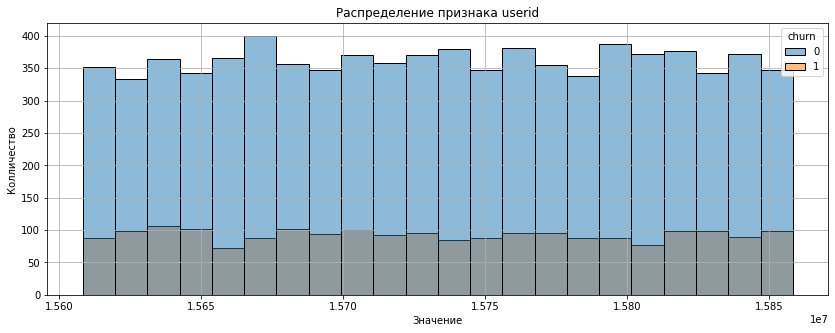

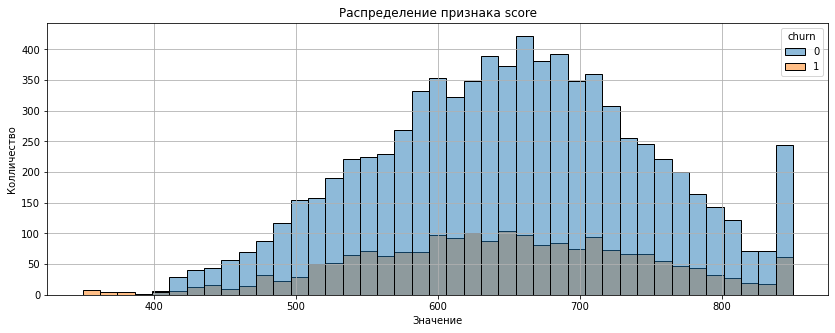

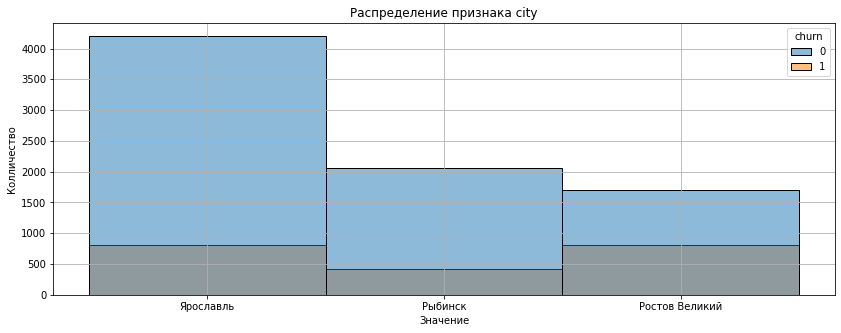

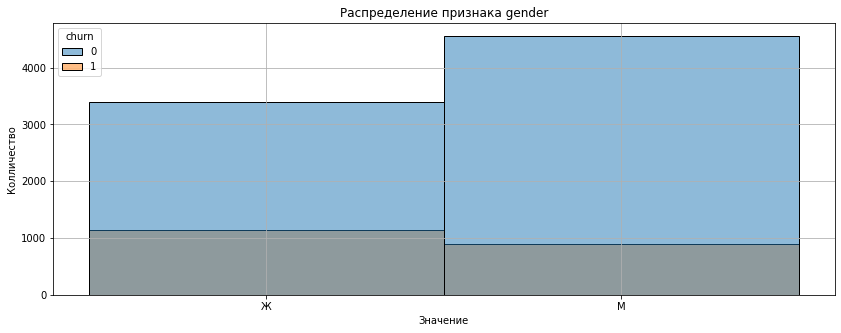

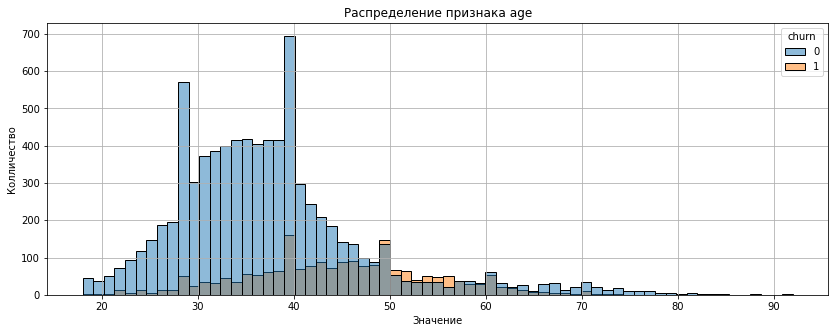

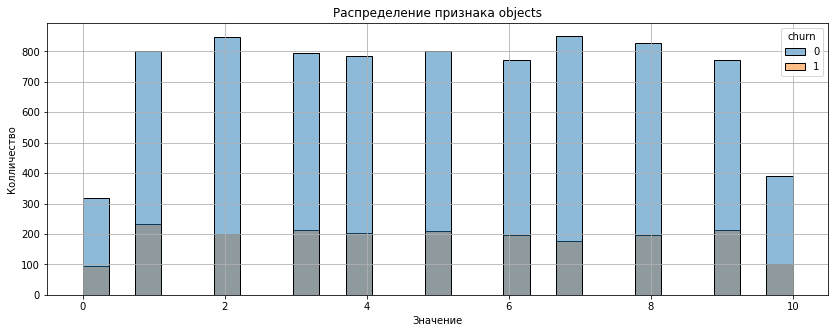

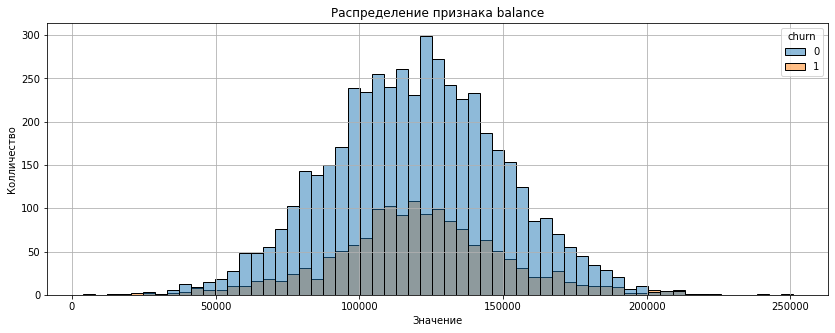

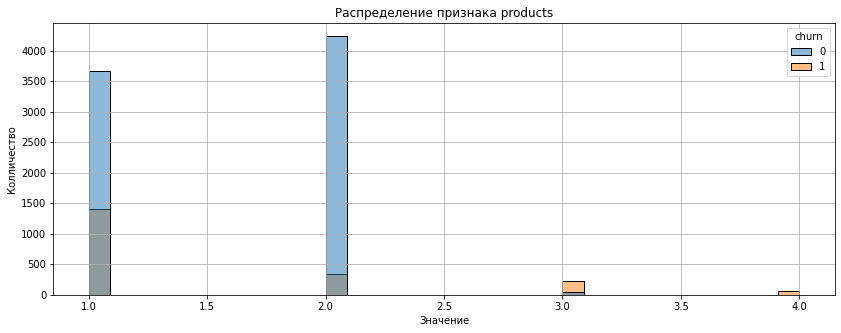

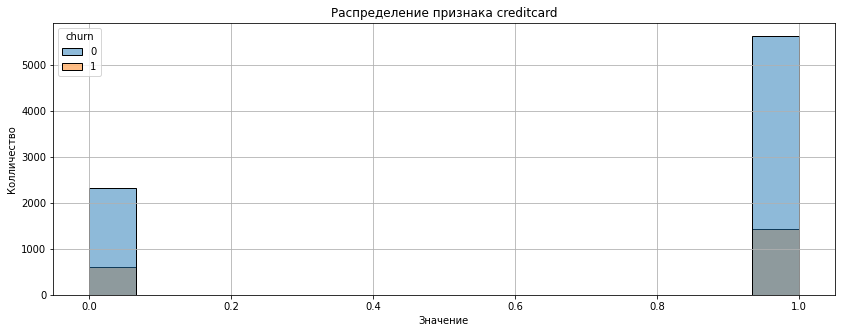

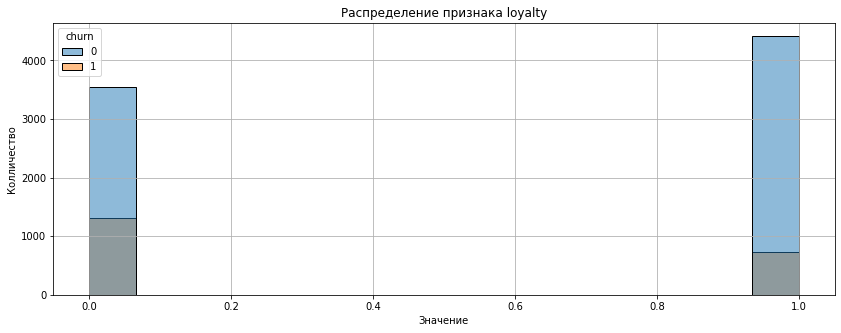

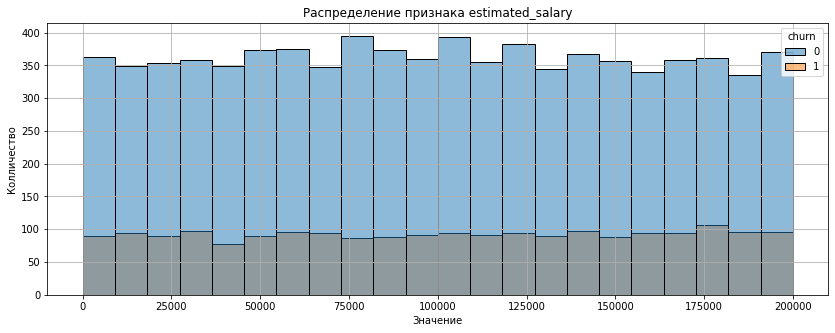

TypeError: unsupported operand type(s) for -: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

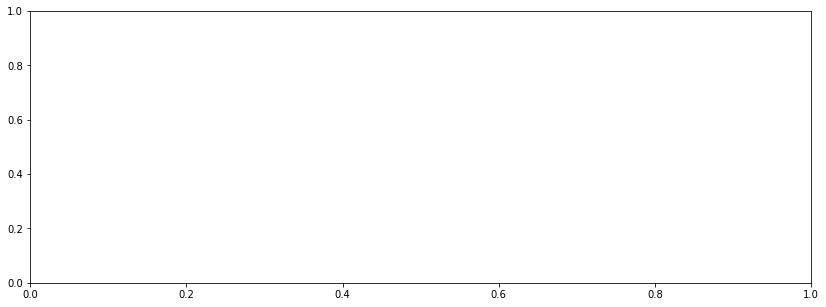

In [22]:
hist(bank_data, columns)

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;💡<br>
Тут в гистограммах видны различия, если приглядеться, но можно сделать их более наглядными, если применить <tt>sns.histplot</tt> с параметрами <tt>hue</tt> и настройками <tt>stat="density", common_norm=False</tt>. При использовании plt.hist и основанных на нём методах pandas достаточно установить параметр <tt>density=True</tt>, также понадобится установить прозрачность (цвета лучше подобрать так, чтобы было меньше затруднений от того, что они смешаются).
</div>

* Ярославль (чуть больше 4000 клиентов остались в банке, чуть меньше 1000 ушли)
* Рыбинск (2000 клиентов остались в банке, чуть меньше 500 ушли)
* Ростов Великий ( 1750 клиентов остались в банке, 750 клиентов ушли)


* Женщины ( 3400 остались, чуть больше 1000 ушли)
* Мужчины (4600 остались, почти 1000 ушли)


* В среднем из банка ушли, клиенты старшего возраста

* Клиента с 1 продуктом (3600 остались, 1400 ушли)
* Клиента с 2 продуктами ( 4300 остались, 400 ушли)


* Клиент имеет кредитную карту (5700 остались, 1300 ушли)
* У клиента нет кредитной карты (2300 остались, 700 ушли)

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
И какие из этого выводы? У кого отток выше? Из какого они города, какого они пола, сколько у них продуктов? Где 3-4 продукта? По кредитной карте отличия по уровню отока есть среди её обладателей и тех, у кого её нет?
</div>

* Активные клиента уходят меньше чем неактивные

<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>✔️</big></b></div>

In [23]:
bank_data_corr = pd.get_dummies(bank_data, columns=['gender','city'])
display(bank_data_corr.head())

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,q_age,q2_age,gender_Ж,gender_М,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,"(37.0, 44.0]",38-44,1,0,0,0,1
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,"(37.0, 44.0]",38-44,1,0,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,"(37.0, 44.0]",38-44,1,0,0,0,1
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,"(37.0, 44.0]",38-44,1,0,0,0,1
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,"(37.0, 44.0]",38-44,1,0,0,1,0


In [24]:
bank_data_corr.groupby('churn').agg('mean')

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,gender_Ж,gender_М,city_Ростов Великий,city_Рыбинск,city_Ярославль
churn,,,,,,,,,,,,,,
0,1.573390e+07,651.853196,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772,0.427477,0.572523,0.212859,0.259199,0.527942
1,1.573279e+07,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531,0.559156,0.440844,0.399607,0.202749,0.397644


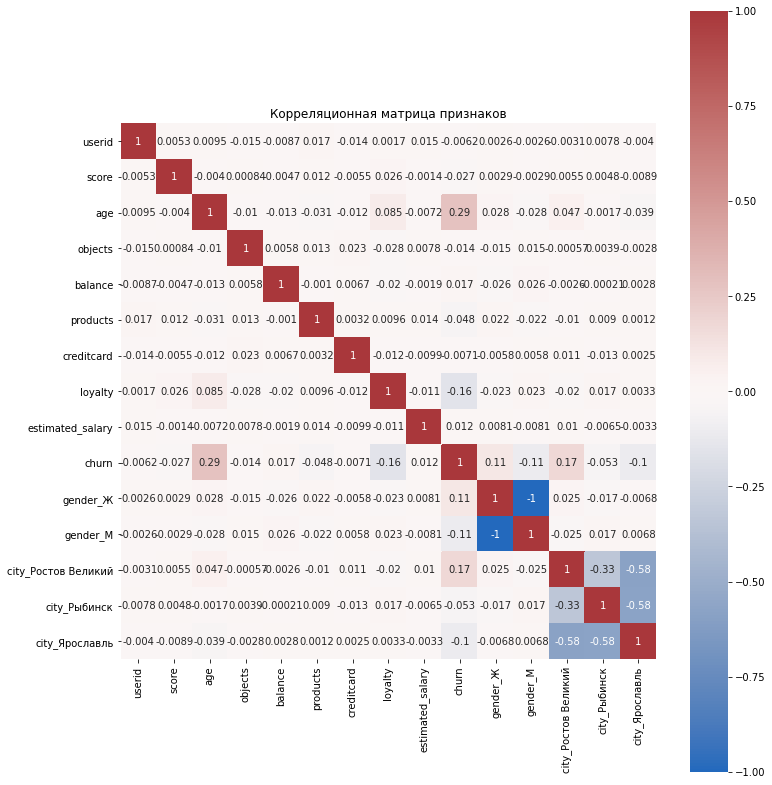

In [25]:
fig, ax = plt.subplots(figsize=(12,14))

sns.heatmap(bank_data_corr.corr(), annot = True, square=True, cmap="vlag")
ax.set_title("Корреляционная матрица признаков")
plt.show()

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;💡<br>
Для корреляционных матриц стоит выбирать <a href='https://seaborn.pydata.org/tutorial/color_palettes.html'>цветовые схемы</a>, у которых по центру находится нейтральный цвет, а по краям — два явно различимых, например <tt>'vlag'</tt>, при этом установка для <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'><tt>sns.heatmap<tt></a> параметров vmax, vmin или center позволяет убедиться, что незначимые (близкие к нолю) значения будут обозначаться именно нейтральным цветом. Также стоит указывать параметр fmt, например, устанавливая отображение значений в виде процентов без дробной части.

Могу посоветовать также <a href='https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7'>матрицу корреляций phic</a> — она улавливает даже нелинейные зависимости.
</div>

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
В презентации будет хорошо смотреться heatmap в один столбец (churn) из этой корреляционной матрицы, отсортированный по величине корреляции, но без самой строки (churn). Её можно убрать методом drop
</div>

У оттока самая большая корреляция (0.29 - это слабая связь) с возрастом клиента, все остальное намного ниже и связь отсутствует  
Можем отметить корреляцию (0.4 - тоже слабая связь) у города Ростов Великий и баланса клиента  
Так же можно отметить обратную слабую связь( -0.3), между колличеством продуктов и балансом клиента

<AxesSubplot:>

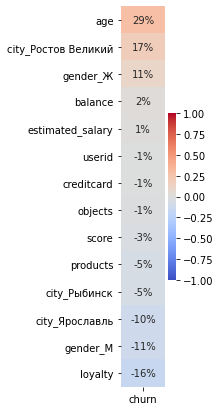

In [26]:
fig, ax = plt.subplots(figsize=(1,7))
sns.heatmap(bank_data_corr.corr()[['churn']].sort_values('churn',ascending=False).drop(labels='churn'), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', fmt='.0%')

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Эти связи с балансом — последствия импутации.
</div>

**Сегментируем пользователей на основе данных о количестве потребляемых продуктов**


In [27]:
bank_data.groupby('products')['score'].agg('count')

products
1    5084
2    4590
3     266
4      60
Name: score, dtype: int64

In [28]:
bank_data_corr.groupby('products').agg('mean')

,userid,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn,gender_Ж,gender_М,city_Ростов Великий,city_Рыбинск,city_Ярославль
products,,,,,,,,,,,,,,
1,1.573237e+07,649.120968,39.673092,4.974626,119894.163723,0.703777,0.504131,99487.256851,0.277144,0.451613,0.548387,0.265342,0.240165,0.494493
2,1.573484e+07,652.188671,37.753595,5.051852,119660.944362,0.707190,0.532898,100452.012821,0.075817,0.448802,0.551198,0.226580,0.257734,0.515686
3,1.574182e+07,648.105263,43.195489,5.003759,119475.686310,0.714286,0.424812,104318.130564,0.827068,0.560150,0.439850,0.360902,0.248120,0.390977
4,1.571936e+07,653.583333,45.683333,5.300000,122260.610870,0.683333,0.483333,104763.723333,1.000000,0.633333,0.366667,0.400000,0.116667,0.483333


* Все у кого 4 продукта ушли из банка их всего 60 человек
* Клиенты у которых 3 продукта их всего 266 человек, из них 83% ушли
* Клиенты у кого 1 продукт (их 5000, из них 28% отток)
* Клиенты у кого 2 продукта (их 4600, их них 8% отток)

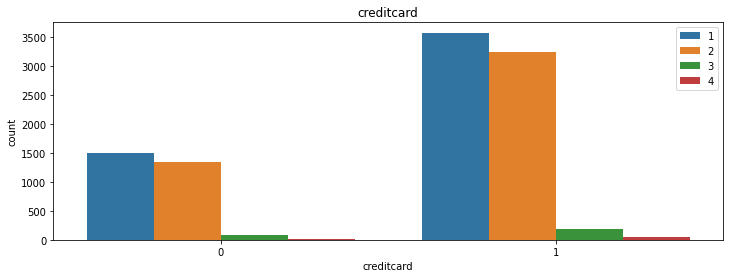

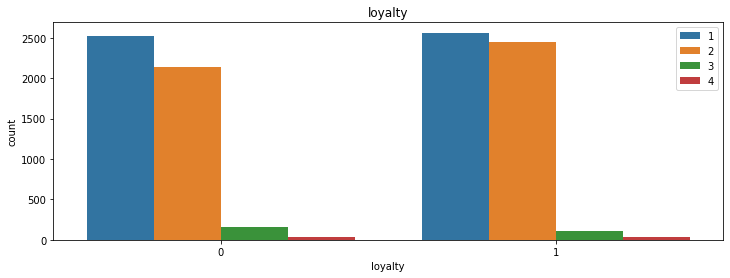

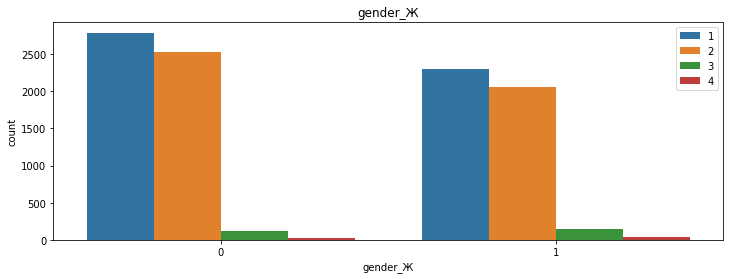

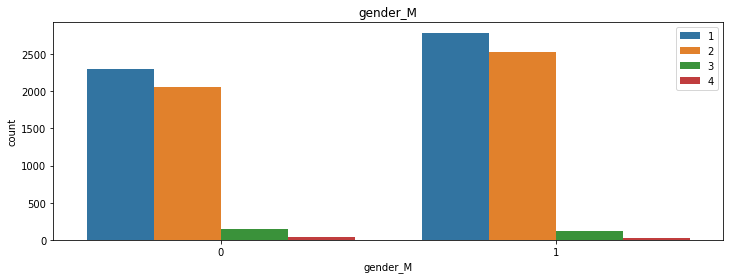

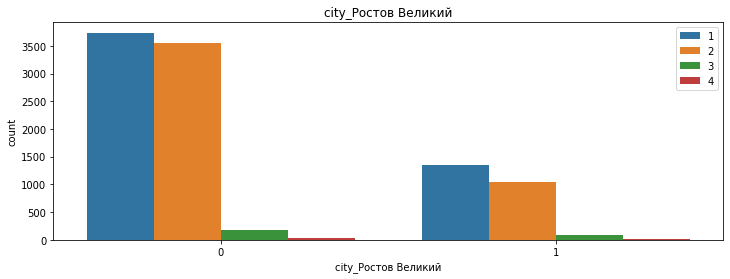

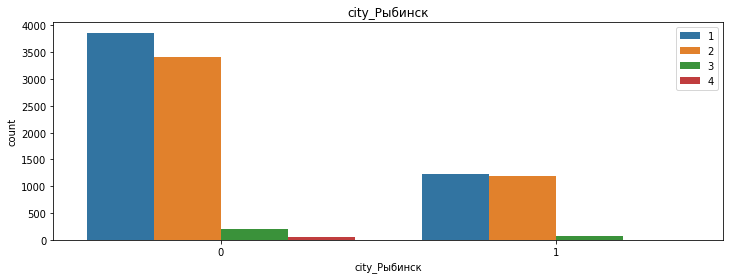

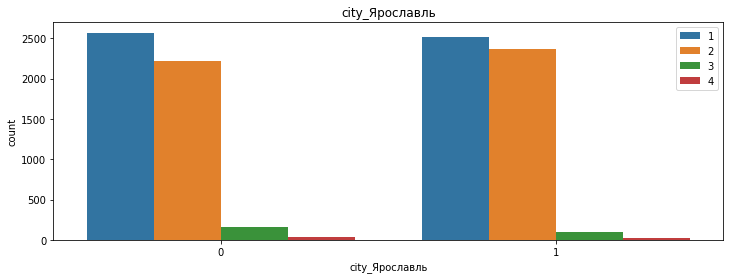

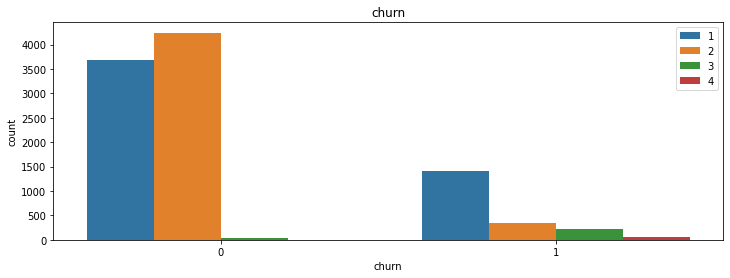

In [29]:
categorical_columns = ['creditcard', 'loyalty', 'gender_Ж', 'gender_М', 'city_Ростов Великий', 'city_Рыбинск', 'city_Ярославль','churn']

for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=bank_data_corr[column], hue="products", data=bank_data_corr)
    plt.title(column)
    plt.legend()
    plt.show()

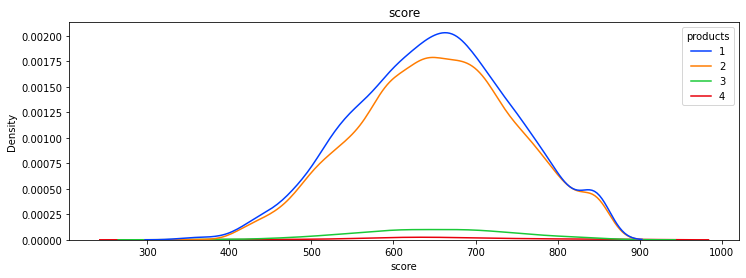

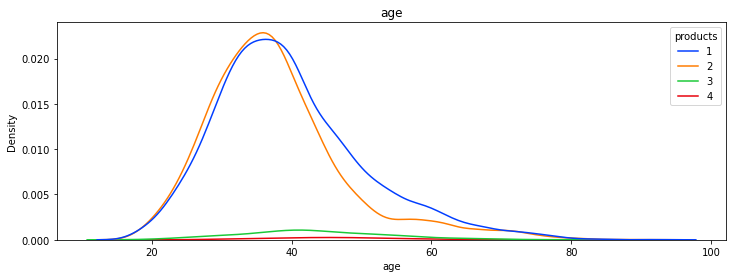

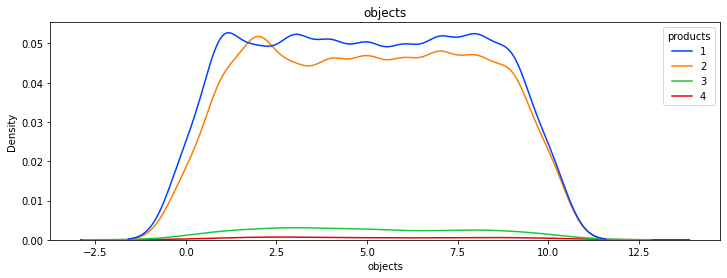

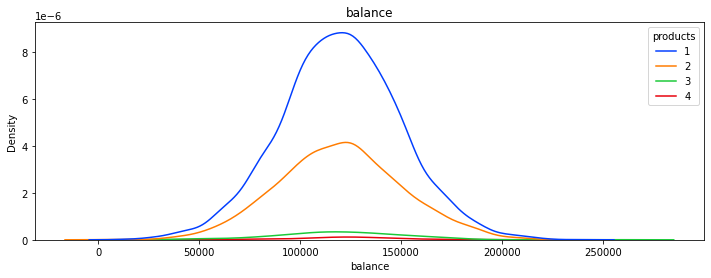

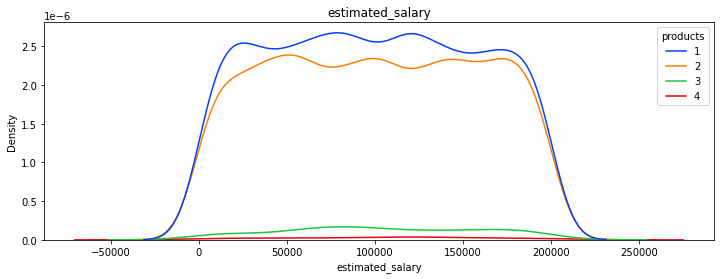

In [30]:
numeric_columns = ['score', 'age', 'objects', 'balance', 'estimated_salary']

for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.kdeplot(x=bank_data[column], hue="products", data=bank_data, palette='bright',legend=True)
    plt.title(column)
    plt.show()

**Параметры, которые свидетельствуют о возможном уходе клиента в отток:**  
* Возраст выше среднего
* У клиента всего 1 продукт  
Если у клиента 2 продукта % оттока резко снижается

<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Перед выделением сегментов, мы сначала на основе анализа средних по подготовленным данным можем построить портрет отточного и не отточного клиента (часть признаков надо будет правильно закодировать), затем на основе анализа всех показателей (прежде всего количества продуктов) в разрезе уровня оттока мы выделяем стратегические признаки, влияющие на отток. Также в процессе мы обязательно должны провести деление стратегически важных численных признаков на интервальные категории в соответствии с уровнем оттока.

Наиболее просто затем тут сделать сегментацию, выделяя сегменты по стратегическим показателям и анализируя их размер и уровень оттока — если размер большой, а превышение уровня оттока над средним небольшое, то это признак того, что нужно объединить этот признак ещё с каким-то и получить более компактный и отточный сегмент. Нужно следить, чтобы сегменты не стали совсем мелкими. 

После выделения нескольких таких сегментов мы уже сможем таргетированно дать для них какие-то рекомендации. Идеально будет ввести какую-то метрику, которая позволит приоритизировать сегменты (выделить те, воздействие на которые приведёт к максимальному эффекту в масштабах банка). Обычно такая метрика одновременно учитывает и отток, и размер сегмента.
    
Пожалуйста:
* чётко определи стратегически важные признаки
* раздели возраст на отточный и не отточные интервалы
* при помощи кода ниже выдели одновременно достаточно крупные и отточные сегменты
</div>

**Cтратегически важные признаки влияющие на отток:**  
* Возраст
* Город проживания
* Пол
* Лояльность
* Количество продуктов

Возраст 18-32 отток 7% неотточный  
Возраст 33-37 отток 10% неотточный  
Возраст 38-44 отток 21%, это очень близко к среднему значению  
Возраст 45-92 отток 45% отточный  
Средний отток 20%

In [31]:
### КОД РЕВЬЮЕРА
df_temp = pd.read_csv('/datasets/bank_dataset.csv')
df_temp.columns = df_temp.columns.str.lower()
age_break = np.random.choice(range(37,46))
examples = [
    ("без пропусков в балансе",'balance == balance'),
    ("не с двумя продуктами",'products != 2'),
    ("неактивные ростовчане", 'city == "Ростов Великий" and loyalty == 0'),
    ("неактивные женщины", 'gender == "Ж" and loyalty == 0'),
    ("пользователи 3 и 4 продуктов",'products > 2'),
    ("в возрасте",f'age > {age_break} and age <= {age_break+20}'),
    ("с одним продуктом",'products == 1'),
    ("в возрасте с одним продуктом",'age > 40 and age <= 60 and products == 1'),
]

# по заданным запросам делаем табличку с размерами разных групп 
# и уровнем оттока в группе и внё её
dfs_temp = []
for text, query in examples:
    this_data = df_temp.query(query)
    other_data_idx = df_temp.index.difference(this_data.index)
    result = this_data\
              .agg({"churn":["count","mean"]}).T
    result.loc['churn','other_churn'] = df_temp.loc[other_data_idx].agg({"churn":"mean"}).item()
    result.index = [text]
    result = result.rename(columns={"count":"num","mean":"churn"})
    dfs_temp.append(result)
    
# придумаем коэффициент, по которому будем ранжировать группы
# поправку на размер сегмента можно выбрать и другую:
# np.log, np.sqrt, вообще обойтись без поправки
df_temp = pd.concat(dfs_temp)
df_temp['coef'] = (np.cbrt(df_temp.num) * (df_temp.churn - df_temp.other_churn)).round(1) * 10
df_temp.sort_values('coef',ascending=False)\
       .style.format({"churn":"{:.1%}","other_churn":"{:.1%}","num":"{:.0f}","coef":"{:.0f}"})

,num,churn,other_churn,coef
пользователи 3 и 4 продуктов,326,85.9%,18.2%,47
в возрасте,1847,49.9%,13.7%,44
в возрасте с одним продуктом,1747,49.7%,14.2%,43
не с двумя продуктами,5410,31.2%,7.6%,41
неактивные ростовчане,1261,41.1%,17.4%,26
с одним продуктом,5084,27.7%,12.8%,26
неактивные женщины,2259,32.1%,16.9%,20
без пропусков в балансе,6383,24.1%,13.8%,19


In [32]:
### КОД СТУДЕНТА
df_temp = pd.read_csv('/datasets/bank_dataset.csv')
df_temp.columns = df_temp.columns.str.lower()
age_break = np.random.choice(range(37,46))
examples = [
    ("без пропусков в балансе",'balance == balance'),
    ("в возрасте 45+ ростовчане", 'city == "Ростов Великий" and age>=45'),
    ("не с двумя продуктами",'products != 2'),
    ("неактивные ростовчане", 'city == "Ростов Великий" and loyalty == 0'),
    ("женщина из Ростова", 'city == "Ростов Великий" and gender == "Ж"'),
    ("неактивные женщины", 'gender == "Ж" and loyalty == 0'),
    ("пользователи 3 и 4 продуктов",'products > 2'),
    ("в возрасте 45+",'age>=45'),
    ("с одним продуктом",'products == 1'),
    ("в возрасте 45+ с одним продуктом",'age>=45 and products == 1'),
]

# по заданным запросам делаем табличку с размерами разных групп 
# и уровнем оттока в группе и внё её
dfs_temp = []
for text, query in examples:
    this_data = df_temp.query(query)
    other_data_idx = df_temp.index.difference(this_data.index)
    result = this_data\
              .agg({"churn":["count","mean"]}).T
    result.loc['churn','other_churn'] = df_temp.loc[other_data_idx].agg({"churn":"mean"}).item()
    result.index = [text]
    result = result.rename(columns={"count":"num","mean":"churn"})
    dfs_temp.append(result)
    
# придумаем коэффициент, по которому будем ранжировать группы
# поправку на размер сегмента можно выбрать и другую:
# np.log, np.sqrt, вообще обойтись без поправки
df_temp = pd.concat(dfs_temp)
df_temp['coef'] = (np.cbrt(df_temp.num) * (df_temp.churn - df_temp.other_churn)).round(1) * 10
df_temp.sort_values('coef',ascending=False)\
       .style.format({"churn":"{:.1%}","other_churn":"{:.1%}","num":"{:.0f}","coef":"{:.0f}"})

,num,churn,other_churn,coef
пользователи 3 и 4 продуктов,326,85.9%,18.2%,47
в возрасте 45+ с одним продуктом,1374,54.0%,15.0%,43
в возрасте 45+,2340,44.6%,13.0%,42
не с двумя продуктами,5410,31.2%,7.6%,41
в возрасте 45+ ростовчане,688,61.6%,17.3%,39
неактивные ростовчане,1261,41.1%,17.4%,26
с одним продуктом,5084,27.7%,12.8%,26
женщина из Ростова,1193,37.6%,18.0%,21
неактивные женщины,2259,32.1%,16.9%,20
без пропусков в балансе,6383,24.1%,13.8%,19


In [33]:
display(df_temp.sort_values('coef',ascending=False)\
       .style.format({"churn":"{:.1%}","other_churn":"{:.1%}","num":"{:.0f}","coef":"{:.0f}"}))

,num,churn,other_churn,coef
пользователи 3 и 4 продуктов,326,85.9%,18.2%,47
в возрасте 45+ с одним продуктом,1374,54.0%,15.0%,43
в возрасте 45+,2340,44.6%,13.0%,42
не с двумя продуктами,5410,31.2%,7.6%,41
в возрасте 45+ ростовчане,688,61.6%,17.3%,39
неактивные ростовчане,1261,41.1%,17.4%,26
с одним продуктом,5084,27.7%,12.8%,26
женщина из Ростова,1193,37.6%,18.0%,21
неактивные женщины,2259,32.1%,16.9%,20
без пропусков в балансе,6383,24.1%,13.8%,19


## Сформулируем и проверим статистические гипотезы

* Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

H0 - Доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, равны  
Н1 - Доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, не равны

In [34]:
alpha = 0.05

results = st.mannwhitneyu(
    bank_data.query('products == 1')['estimated_salary'], 
    bank_data.query('products == 2')['estimated_salary'], 
    alternative = 'two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4079566651927651
Не получилось отвергнуть нулевую гипотезу


Не удалось отвергнуть нулевую гипотезу: мы не можем сказать, что доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, не равны

H0 - Отток клиентов, которые пользуются 2+ продуктами банка, и отток тех, которые пользуются 1, равны  
H1 - Отток клиентов, которые пользуются 2+ продуктами банка, и отток тех, которые пользуются 1, не равны

In [35]:
alpha = 0.05

from statsmodels.stats import weightstats as stests

results, pvalue = stests.ztest(
    bank_data.query('products == 1')['churn'], 
    x2=bank_data.query('products > 1')['churn'],
    value = 0,
    alternative='two-sided')

print('p-значение:', float(pvalue))

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.0079099625883425e-79
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу: отток клиентов, которые пользуются 2+ продуктами банка, и отток тех, которые пользуются 1, не равны

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;✔️<br>
Гипотезы сформулированы и проверены верно!
</div><div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;👀<br>
Можно ли было тут применить t-критерий Стьюдента?
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Для применения t-критерия Стьюдента необходимо, чтобы исходные данные имели нормальное распределение. В нашем случае признак estimated_salary имеет равномерное распределение, а churn - бинарная величина </div>

## Выводы:
Мы проанализировали клиентов регионального банка и сегментировали пользователей по количеству потребляемых продуктов.
* Самый большой отток клиентов 32% в городе Ростов Великий. Нужно провести проверку офиса в этом городе, возможно есть проблемы во внутренних процессах или обслуживании клиентов, или офис находится в неудобном для клиентов месте. Может быть мало банкоматов в этом городе  
* Если у клиента всего 1 продукт, он с большей вероятностью попадет в отток. Нужно мотивировать клиентов для оформления дополнительных продуктов, разработать систему допольнительных бонусов  
* Клиенты возраста 45+, с большей вероятностью попадают в отток. Возможно клиентам сложно разобраться как пользоваться картами и совершать финансовые операции. Необходимо разработать подробные инструкции и обучающий материал как пользоваться всеми продуктами банка  
* Неактивные пользователи, с большей вероятностью попадают в отток. Необходимо разработать и предложиться неактивным клиентам, дополнительные бонусы за использование продуктов и мотивировать клиентов

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;✔️<br>
Краткие, но достаточно конкретные рекомендации.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;📌<br>Чек-лист доделок:

    
* зафиксировать в промежуточных итогах после анализа данных те признаки, которые влияют на отток, сделать графики для презентации (по одному на каждый стратегический признак + кусок или столбец матрицы корреляций для завершающего слайда по признакам)
* разделить возраст на интервалы отточные и нет
* разделить клиентов на сегменты
* дать комментарий по поводу критерия
</div>